### ARIMA Basics
#### Autoregressive Integrated Moving Averages
The general process for ARIMA models is: 
1. Visualize Data
2. Make the series stationary
3. Plot the correlation and autocorrelation charts
4. Construct the ARIMA model
5. Predict

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('perrin-freres-monthly-champagne.csv')
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [13]:
# Data Cleaning
df.columns=['Month', 'Sales']
df.head()
df.dropna(inplace=True)
df['Month']=pd.to_datetime(df['Month'], format='%Y-%m')
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


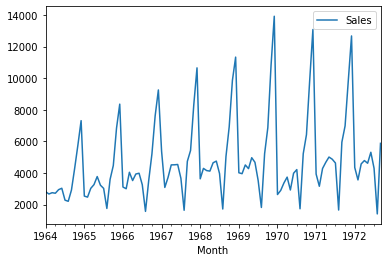

In [14]:
# Visualize
df.set_index('Month').plot()

In [23]:
# Stationary Test
from statsmodels.tsa.stattools import adfuller
stationary_test=adfuller(df['Sales'])
results=['ADF Test Statistic', 'p', 'lag_num', 'obs_num']
dict(zip(results, stationary_test))
# p-value < 0.05 = fail to reject H0 -> this is not stationary

{'ADF Test Statistic': -1.8335930563276297,
 'p': 0.3639157716602417,
 'lag_num': 11,
 'obs_num': 93}

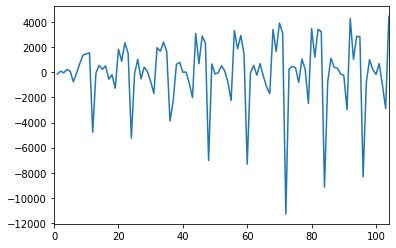

In [27]:
# 1 period differencing 
df['Sales'].diff().plot()

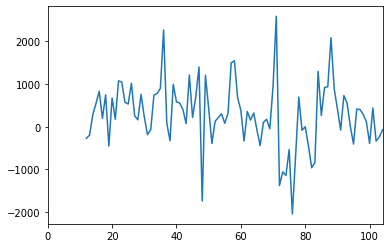

In [28]:
# 12 periods differencing
df['Sales'].diff(12).plot()

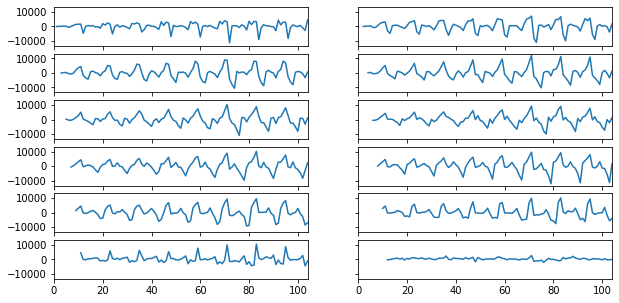

In [34]:
fig, ax=plt.subplots(6, 2, figsize=(10, 5), sharey=True, sharex=True)
for idx, each_period in enumerate(range(1, 13)):
    df['Sales'].diff(each_period).plot(ax=ax[int(idx/2)][idx%2])

### Using ACF and PACF for ARIMA
**ACF**
* auto-correlation function which gives us the values of auto-correlation of any series with its lagged values
* ACF plot is the auto-correlation with its lagged values and the confidence band
* it describes how well the present value of the series is related with its past values
* time series can have components like trend, seasonality, cyclic, and residual

**PACF**
* partial auto-correlation function finds correlation of the residuals (remaining after removing the effects explained by earlier lag(s)
* tells us if there is any information in the residual that can be modled by the next lag

When modeling, we don't want to keep too many features which are correlated as that can create multicollinearity issues

### AR-I-MA
**AR**
* a series is said to be AR when present value of the time series can be obtained using previous values of the same time series, i.e. the present value is a weighted average of its past values
* use PACF plot to find p - where p is the lag value after which PACF plot crosses the upper confidence interval for the first time

**MA**
* a process where the present value of series is defined as a linear combination of past errors
* assume errors to be normally distributed
* use ACF to find q - where q is the lag value after which ACF plot crosses the upper confidence interval for the first time

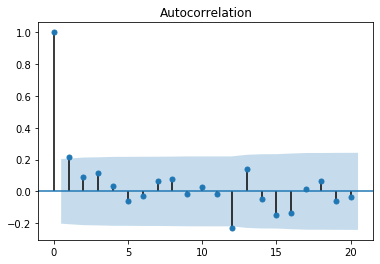

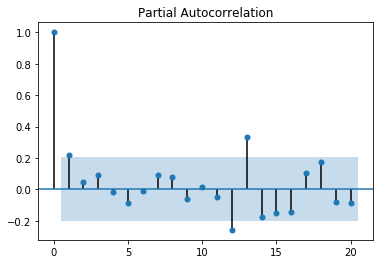

In [41]:
# finding the p(AR model lags), d(differencing), and q(MA model lags)
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Sales'].diff(12).dropna())
plot_pacf(df['Sales'].diff(12).dropna())
plt.show()

In [45]:
# select 1, 12, 1 for p, d, q
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['Sales'], order=(1, 1, 1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Thu, 12 Nov 2020   AIC                           1910.251
Time:                        01:19:28   BIC                           1920.829
Sample:                             1   HQIC                          1914.536
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7847     12.405      1.837      0.069      -1.529      47.099
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

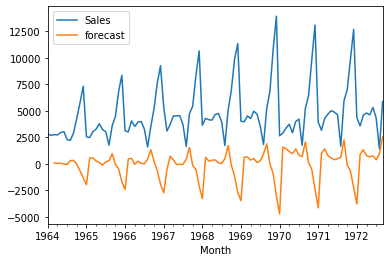

In [48]:
df['forecast']=model_fit.predict()
df.set_index('Month').plot()

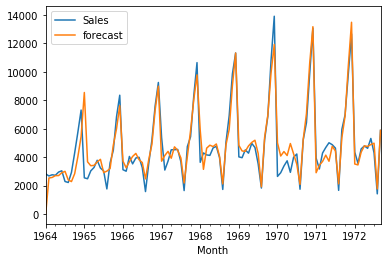

In [51]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit=model.fit()
df['forecast']=model_fit.predict()
df.set_index('Month').plot()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check

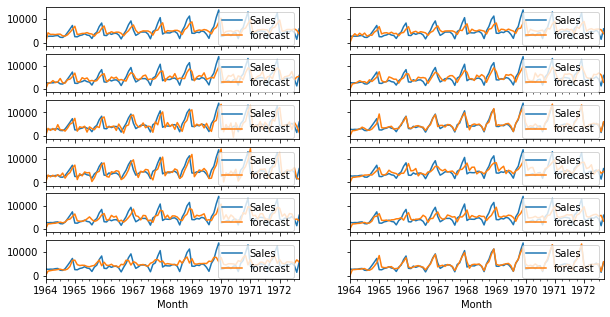

In [54]:
fig, ax=plt.subplots(6, 2, figsize=(10, 5), sharey=True, sharex=True)
for idx, each_period in enumerate(range(1, 13)):
    model=sm.tsa.statespace.SARIMAX(df['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, each_period))
    model_fit=model.fit()
    df['forecast']=model_fit.predict()
    df.set_index('Month').plot(ax=ax[int(idx/2)][idx%2])